In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from img_features import *

# One image

## Load

Upload the image.

(256, 256, 3)

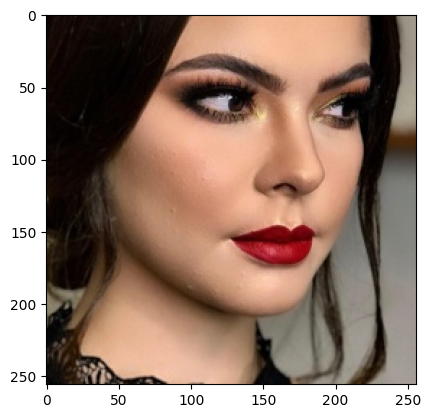

In [59]:
colored_test_image = load_img('../_datasets/Makeup-Wild/makeup/1.jpg', as_gray=False)
plt.imshow(colored_test_image)
colored_test_image.shape

Upload the image and convert it to grayscale.

(256, 256)

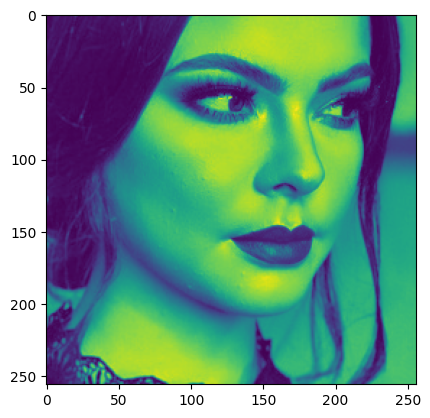

In [60]:
test_image = load_img('../_datasets/Makeup-Wild/makeup/1.jpg', as_gray=True)
plt.imshow(test_image)
test_image.shape

Upload as Mediapipe image.

In [66]:
mp_test_image = load_img('../_datasets/Makeup-Wild/makeup/1.jpg', as_mediapipe_image=True)

## Preprocessing (optionals)

Blur the image.

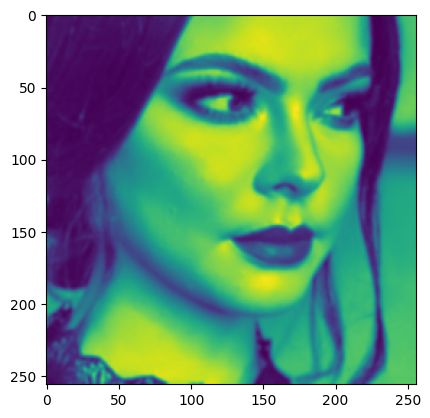

In [11]:
blured_image = blurred_img(test_image, sigma=1)
plt.imshow(blured_image)

Resize the image.

(100, 100)

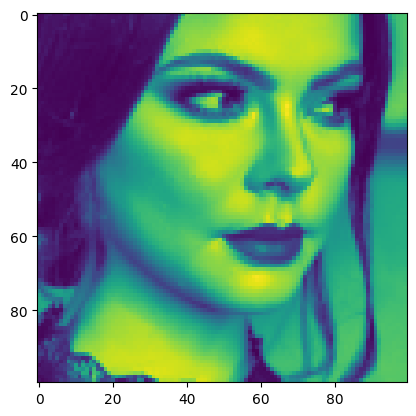

In [13]:
resize_img = resize(test_image, output_shape=(100, 100))
plt.imshow(resize_img)
resize_img.shape

Normalize the image.

In [22]:
normalized_image = normalize_img(test_image)

In [20]:
test_image

array([[0.02542627, 0.03719098, 0.02569412, ..., 0.60160706, 0.60496314,
        0.60496314],
       [0.02150471, 0.02542627, 0.02205529, ..., 0.59768549, 0.60104157,
        0.60104157],
       [0.02542627, 0.02150471, 0.01561098, ..., 0.60160706, 0.60496314,
        0.60104157],
       ...,
       [0.04900824, 0.02547882, 0.01763569, ..., 0.61590157, 0.61590157,
        0.62374471],
       [0.05825804, 0.0386502 , 0.01960784, ..., 0.61982314, 0.62374471,
        0.62374471],
       [0.05433647, 0.04257176, 0.01960784, ..., 0.62374471, 0.62374471,
        0.61982314]])

In [21]:
normalized_image

array([[9.97108804e-05, 1.45846982e-04, 1.00761246e-04, ...,
        2.35924337e-03, 2.37240446e-03, 2.37240446e-03],
       [8.43321799e-05, 9.97108804e-05, 8.64913495e-05, ...,
        2.34386467e-03, 2.35702576e-03, 2.35702576e-03],
       [9.97108804e-05, 8.43321799e-05, 6.12195309e-05, ...,
        2.35924337e-03, 2.37240446e-03, 2.35702576e-03],
       ...,
       [1.92189158e-04, 9.99169550e-05, 6.91595540e-05, ...,
        2.41530027e-03, 2.41530027e-03, 2.44605767e-03],
       [2.28462899e-04, 1.51569396e-04, 7.68935025e-05, ...,
        2.43067897e-03, 2.44605767e-03, 2.44605767e-03],
       [2.13084198e-04, 1.66948097e-04, 7.68935025e-05, ...,
        2.44605767e-03, 2.44605767e-03, 2.43067897e-03]])

## LPB feature extraction

In [23]:
lbp_features = extract_lbp_features(test_image, n_points = 15, radius = 3, method='uniform')

C:\Program Files\Python\Python311\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [24]:
lbp_features

array([[ 0.,  0., 16., ...,  2.,  1.,  0.],
       [ 0.,  2., 16., ...,  2.,  0.,  2.],
       [ 0.,  5.,  9., ...,  1.,  0.,  1.],
       ...,
       [ 0.,  5., 16., ...,  8.,  7.,  1.],
       [ 0.,  1.,  7., ..., 16.,  0.,  0.],
       [ 0.,  0.,  7., ...,  0.,  0.,  1.]])

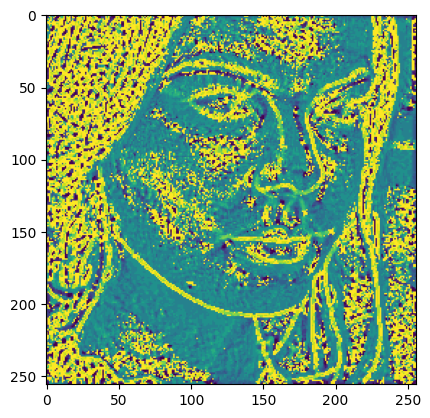

In [25]:
plt.imshow(lbp_features)

Extract with histogram.

In [26]:
lbp_features = extract_lbp_features(test_image, n_points = 15, radius = 3, method='uniform', histogram=True)
lbp_features

C:\Program Files\Python\Python311\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(array([[ 0.,  0., 16., ...,  2.,  1.,  0.],
        [ 0.,  2., 16., ...,  2.,  0.,  2.],
        [ 0.,  5.,  9., ...,  1.,  0.,  1.],
        ...,
        [ 0.,  5., 16., ...,  8.,  7.,  1.],
        [ 0.,  1.,  7., ..., 16.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  1.]]),
 array([ 2199,  1806,  1508,  1389,  1609,  2669,  4951, 10949,  9587,
         3775,  1769,  1085,   949,  1267,  1774,  2490, 15760],
       dtype=int64))

In [27]:
lbp_features[1].shape

(17,)

## HOG features extraction

In [28]:
hog_features = extract_hog_features(test_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                                    block_norm='L2-Hys')
hog_features

array([0.23328445, 0.2002255 , 0.03856413, ..., 0.02362503, 0.01848543,
       0.00210107])

With HOG image.

In [30]:
hog_features = extract_hog_features(test_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3),
                                    block_norm='L2-Hys', visualize=True)
hog_features

(array([0.23328445, 0.2002255 , 0.03856413, ..., 0.02362503, 0.01848543,
        0.00210107]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.00032997, ..., 0.00097273, 0.        ,
         0.        ],
        [0.        , 0.00043375, 0.        , ..., 0.        , 0.00058381,
         0.        ],
        ...,
        [0.        , 0.00125409, 0.        , ..., 0.        , 0.00183358,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00085437, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

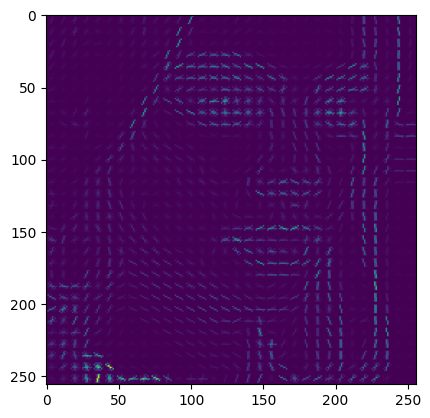

In [31]:
plt.imshow(hog_features[1])

## Face landmarks extraction

In [77]:
landmarks = extract_face_landmarks(mp_test_image)

In [78]:
landmarks

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.6698955297470093, y=0.5801239013671875, z=-0.08143032342195511, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7132265567779541, y=0.4661732316017151, z=-0.15763108432292938, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6774919033050537, y=0.498190701007843, z=-0.07905075699090958, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6766909956932068, y=0.364261269569397, z=-0.1378926932811737, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7197105884552002, y=0.43603992462158203, z=-0.1696673035621643, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.7141555547714233, y=0.39586734771728516, z=-0.1602322906255722, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.6901758313179016, y=0.2939286530017853, z=-0.0888066440820694, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.4177899658679962, y=0.24795758724212646, z=-0.06652126461267471, visibility=0.0, presence=0.0), NormalizedLandmark(x=

# Array of images

## Load

Load images from directory and set labels.

In [88]:
imgs = Images(paths=['../_datasets/Makeup-Wild/makeup', '../_datasets/Makeup-Wild/no_makeup'],
              labels=[1, 0], as_gray=True, normalize=True)

In [89]:
imgs.X.shape

(718, 256, 256)

Load Mediapipe images.

In [90]:
mp_imgs = MPImages(paths=['../_datasets/Makeup-Wild/makeup', '../_datasets/Makeup-Wild/no_makeup'],
              labels=[1, 0])

In [91]:
imgs.X.shape

(718, 256, 256)

## LPB feature extraction

In [80]:
lbp = LBPFeatures(imgs.X)

C:\Program Files\Python\Python311\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [94]:
print(lbp.values.shape, lbp.histograms.shape)

(718, 256, 256) (718, 17)


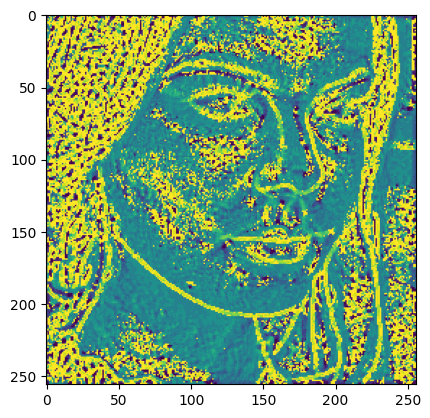

In [83]:
lbp.show(index=0, type='image')

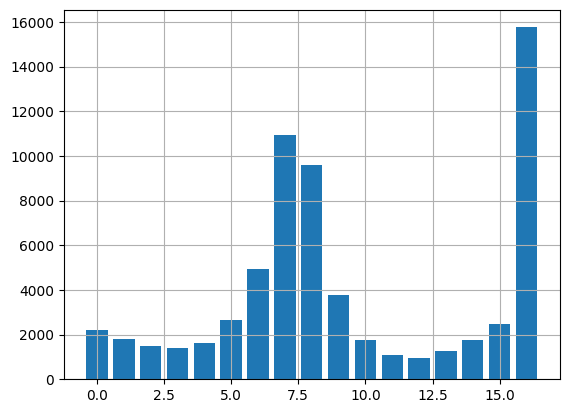

In [84]:
lbp.show(index=0, type='histogram')

## HOG feature extraction

In [85]:
hog = HOGFeatures(imgs.X)

In [95]:
hog.values.shape

(718, 72900)

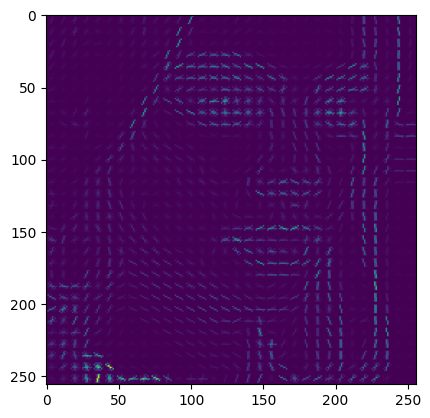

In [86]:
hog.show(index=0)

## Face landmarks extraсtion

In [97]:
mp_imgs.extract_face_landmarks()

No face landmarks for image 146
No face landmarks for image 202
No face landmarks for image 282
No face landmarks for image 377
No face landmarks for image 501
No face landmarks for image 706


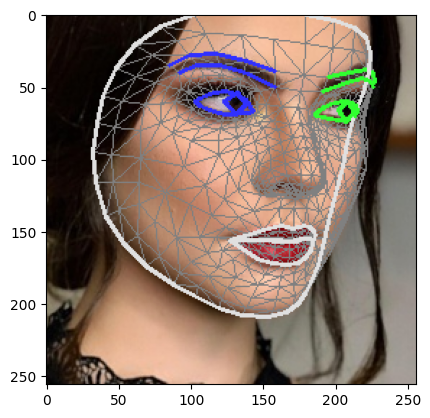

In [98]:
mp_imgs.draw_landmarks(index=0)

In [101]:
landmarks_frames = mp_imgs.get_landmark_frames()
landmarks_frames

array([[[ 6.69895530e-01,  5.80123901e-01, -8.14303234e-02],
        [ 7.13226557e-01,  4.66173232e-01, -1.57631084e-01],
        [ 6.77491903e-01,  4.98190701e-01, -7.90507570e-02],
        ...,
        [ 8.13514173e-01,  2.37813205e-01,  8.62488598e-02],
        [ 7.89647520e-01,  2.60969132e-01,  8.62087682e-02],
        [ 8.09292078e-01,  2.89134294e-01,  8.62158164e-02]],

       [[ 6.65423036e-01,  6.39822125e-01, -8.84132013e-02],
        [ 7.15841949e-01,  5.55201411e-01, -1.49900109e-01],
        [ 6.73377275e-01,  5.83910942e-01, -8.13106894e-02],
        ...,
        [ 7.46808767e-01,  3.43406320e-01,  1.09668421e-02],
        [ 7.13748336e-01,  3.66702914e-01,  1.09298695e-02],
        [ 7.37886548e-01,  3.98938775e-01,  1.09325983e-02]],

       [[ 7.49802947e-01,  5.76034904e-01, -4.88944538e-02],
        [ 7.72686601e-01,  4.85139549e-01, -1.52598739e-01],
        [ 7.46143341e-01,  5.20978272e-01, -7.02095851e-02],
        ...,
        [ 7.11813569e-01,  2.45293885e-01,